This is the notebook from class on Feb 25, 2020.  Lightly annotated.

In [1]:
import nltk

In [2]:
from nltk.corpus import movie_reviews

Corpora know how to do certain things, like tell you what files they contain.

In [3]:
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [4]:
len(movie_reviews.fileids())

2000

In [5]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

...or tell you what categories they contain

In [6]:
movie_reviews.categories()

['neg', 'pos']

They can give you the words in each file as a big list

In [7]:
movie_reviews.words('pos/cv995_21821.txt')[:10]

['wow', '!', 'what', 'a', 'movie', '.', 'it', "'", 's', 'everything']

Or they can give you the words divided into sentences (a list of lists of words)

In [8]:
movie_reviews.sents('pos/cv995_21821.txt')[:2]

[['wow', '!'], ['what', 'a', 'movie', '.']]

In [9]:
rev = 'pos/cv995_21821.txt'

In [10]:
movie_reviews.words(rev)

['wow', '!', 'what', 'a', 'movie', '.', 'it', "'", 's', ...]

We'll move the reviews into a big list in memory first for convenience

In [11]:
documents = [(movie_reviews.words(f), category) \
            for category in movie_reviews.categories() \
            for f in movie_reviews.fileids(category)]

Each element of this list is a pair, the first member being the words, and the second member being the category.

In [12]:
documents[5]

(['capsule', ':', 'in', '2176', 'on', 'the', 'planet', ...], 'neg')

In all we have 2000 reviews

In [13]:
len(documents)

2000

And 1.6 million words

In [14]:
len(movie_reviews.words())

1583820

Making them lower case just in case, they might already be lower case.

In [15]:
lower_words = [w.lower() for w in movie_reviews.words()]

In [16]:
len(lower_words)

1583820

`set()` can create a set from a list, which is useful for determining how many unique elements a list has 

In [17]:
unique_words = set(lower_words)

In [18]:
len(unique_words)

39768

Lexical diversity as the proportion of unique words in a list of words

In [19]:
def lex_div(words):
    return len(set(words)) / len(words)

In [20]:
lex_div(lower_words)

0.02510891389173012

In [21]:
fd = nltk.FreqDist(lower_words)

In [22]:
fd.most_common(5)

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576)]

In [23]:
fd['a']

38106

In [24]:
word_features = [w for (w,c) in fd.most_common(2000)]

In [25]:
word_features[:5]

[',', 'the', '.', 'a', 'and']

In [26]:
example = {'contains(the)': True, 'contains(garbage)': False}

In [27]:
'contains({})'.format("hello")

'contains(hello)'

Creating the features that we will use as the characterization of each review.  One feature for each of the top 2000 words, `True` or `False` depending on whether the document contains the word.

In [28]:
def document_feature(document):
    features = {}
    for w in word_features:
        features['contains({})'.format(w)] = (w in document)
    return features

In [29]:
documents[0]

(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg')

In [30]:
document_feature(documents[0][0])

{'contains(,)': True,
 'contains(the)': True,
 'contains(.)': True,
 'contains(a)': True,
 'contains(and)': True,
 'contains(of)': True,
 'contains(to)': True,
 "contains(')": True,
 'contains(is)': True,
 'contains(in)': True,
 'contains(s)': True,
 'contains(")': True,
 'contains(it)': True,
 'contains(that)': True,
 'contains(-)': True,
 'contains())': True,
 'contains(()': True,
 'contains(as)': True,
 'contains(with)': True,
 'contains(for)': True,
 'contains(his)': True,
 'contains(this)': True,
 'contains(film)': True,
 'contains(i)': True,
 'contains(he)': True,
 'contains(but)': True,
 'contains(on)': True,
 'contains(are)': True,
 'contains(t)': True,
 'contains(by)': True,
 'contains(be)': True,
 'contains(one)': True,
 'contains(movie)': True,
 'contains(an)': True,
 'contains(who)': True,
 'contains(not)': True,
 'contains(you)': True,
 'contains(from)': True,
 'contains(at)': False,
 'contains(was)': False,
 'contains(have)': True,
 'contains(they)': True,
 'contains(has)

This runs very slowly so I have commented it out. Python processes sets much faster.

In [31]:
#featuresets = [(document_feature(d), c) for (d, c) in documents]

This version uses sets and is acceptably fast.

In [32]:
def document_features_set(document):
    document_words = set(document)
    features = {}
    for w in word_features:
        features['contains({})'.format(w)] = (w in document_words)
    return features

In [33]:
featuresets2 = [(document_features_set(d), c) for (d, c) in documents]

In [34]:
featuresets2[0]

({'contains(,)': True,
  'contains(the)': True,
  'contains(.)': True,
  'contains(a)': True,
  'contains(and)': True,
  'contains(of)': True,
  'contains(to)': True,
  "contains(')": True,
  'contains(is)': True,
  'contains(in)': True,
  'contains(s)': True,
  'contains(")': True,
  'contains(it)': True,
  'contains(that)': True,
  'contains(-)': True,
  'contains())': True,
  'contains(()': True,
  'contains(as)': True,
  'contains(with)': True,
  'contains(for)': True,
  'contains(his)': True,
  'contains(this)': True,
  'contains(film)': True,
  'contains(i)': True,
  'contains(he)': True,
  'contains(but)': True,
  'contains(on)': True,
  'contains(are)': True,
  'contains(t)': True,
  'contains(by)': True,
  'contains(be)': True,
  'contains(one)': True,
  'contains(movie)': True,
  'contains(an)': True,
  'contains(who)': True,
  'contains(not)': True,
  'contains(you)': True,
  'contains(from)': True,
  'contains(at)': False,
  'contains(was)': False,
  'contains(have)': True,

Tuple notation for assignment:

In [35]:
x, y = 3, 4

In [36]:
x

3

In [37]:
len(featuresets2)

2000

In [38]:
train_set, test_set = featuresets2[100:], featuresets2[:100]

We've split it so that the test set has 100 reviews in it and the training set has 1900. But there is a problem.

In [39]:
'pos' in [c[1] for c in test_set]

False

Our test set contains no positive reviews at all.  Why?  Well, all of the negative reviews were first in the corpus, and all the positive reviews were last.  So if we split it so that the test set is just the first 100 reviews, they're all going to being negative ones.  We need to randomize and then define the training and test sets.

In [40]:
import random

In [41]:
random.shuffle(featuresets2)

In [42]:
train_set, test_set = featuresets2[100:], featuresets2[:100]

In [43]:
test_set[90][1]

'pos'

In [44]:
'pos' in [c[1] for c in test_set]

True

That's better.

In [45]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [46]:
print(nltk.classify.accuracy(classifier, test_set))

0.83


Ok. That's not too bad.  Given the randomness, the success rate varies, but it's about 80% accurate at predicting whether a review will be positive or negative based on a feature set built from the occurrences of the 2000 most common words in the corpus.  What were the most informative ones?

In [57]:
classifier.show_most_informative_features(10)

Most Informative Features
        contains(seagal) = True              neg : pos    =     12.9 : 1.0
   contains(outstanding) = True              pos : neg    =     11.3 : 1.0
         contains(mulan) = True              pos : neg    =      9.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.5 : 1.0
         contains(damon) = True              pos : neg    =      6.2 : 1.0
         contains(flynt) = True              pos : neg    =      5.7 : 1.0
         contains(awful) = True              neg : pos    =      5.6 : 1.0
        contains(wasted) = True              neg : pos    =      5.6 : 1.0
          contains(lame) = True              neg : pos    =      5.5 : 1.0
         contains(waste) = True              neg : pos    =      5.4 : 1.0


New project, now we're going to use those reviews to do some authorship attribution.  We happen to know that JB wrote the first three reviews mentioned below and SG the next three.  The game will be to see if we can figure out who wrote the mystery one.

In [47]:
jbf = ['29416', '29417', '29439']
sgf = ['29423', '29444', '29465']

In [48]:
myf = ['29497']

This is what the fileids look like, the ID is there in the middle.  It's the slice from 10 to 14.

In [59]:
movie_reviews.fileids()[0]

'neg/cv000_29416.txt'

So we make a list of the fileids for each author based on the ID in the list.

In [49]:
myfids = [f for f in movie_reviews.fileids() if f[10:15] in myf]

In [50]:
jbfids = [f for f in movie_reviews.fileids() if f[10:15] in jbf]

In [51]:
jbfids

['neg/cv000_29416.txt', 'neg/cv009_29417.txt', 'pos/cv015_29439.txt']

In [52]:
sgfids = [f for f in movie_reviews.fileids() if f[10:15] in sgf]

In [53]:
movie_reviews.words(jbfids[0])[:10]

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']

We defined lexical diversity before, we can use it now.

In [64]:
lex_div(movie_reviews.words(jbfids[0]))

0.40273037542662116

In [65]:
lex_div(movie_reviews.words(sgfids[0]))

0.5580246913580247

We'll collect all the lexical diversities in lists.

In [54]:
sgld = [lex_div(movie_reviews.words(f)) for f in sgfids]

In [55]:
jbld = [lex_div(movie_reviews.words(f)) for f in jbfids]

In [56]:
jbld

[0.40273037542662116, 0.3960975609756098, 0.4596100278551532]

In [57]:
sgld

[0.5580246913580247, 0.5686274509803921, 0.5763157894736842]

Now, we'll also compute average word length and average sentence length.  Computing average length can be done with the assistance of `sum()` and `len()` of lists.  Witness:

In [58]:
sum([1, 2, 3])

6

In [59]:
len([1, 2, 3])

3

So, we'll define an average word length function, which gets a list of words and returns a number.

In [60]:
def avg_word_len(word_list):
    return sum([len(w) for w in word_list])/len(word_list)

In [61]:
avg_word_len(movie_reviews.words(jbfids[0]))

3.621160409556314

We can define an average sentence length function.  Though, really, this is the very same function.  It just depends on what you pass in as an argument.  To the extent that this is a record of the class, I will leave this in, but neverthess (as mentioned in class), we didn't need to define `avg_sent_len()` because it does exactly the same thing as `avg_word_len()` does.

In [62]:
def avg_sent_len(sent_list):
    return sum([len(w) for w in sent_list])/len(sent_list)

In [63]:
avg_sent_len(movie_reviews.sents(jbfids[0]))

19.977272727272727

Just to make the point about them being the same:

In [65]:
avg_word_len(movie_reviews.sents(jbfids[0]))

19.977272727272727

Ok, we'll make a function that, given a fileid, will compute authorship-related stats on the file.

In [68]:
def auth_stats(fileid):
    features = {}
    features['lex'] = lex_div(movie_reviews.words(fileid))
    features['word'] = avg_word_len(movie_reviews.words(fileid))
    features['sent'] = avg_sent_len(movie_reviews.sents(fileid))
    return features

Then collect the results together for JB, SG, and the mystery file.

In [69]:
[auth_stats(f) for f in jbfids]

[{'lex': 0.40273037542662116,
  'word': 3.621160409556314,
  'sent': 19.977272727272727},
 {'lex': 0.3960975609756098,
  'word': 3.4634146341463414,
  'sent': 12.654320987654321},
 {'lex': 0.4596100278551532,
  'word': 3.649025069637883,
  'sent': 27.615384615384617}]

In [70]:
[auth_stats(f) for f in sgfids]

[{'lex': 0.5580246913580247, 'word': 3.891358024691358, 'sent': 40.5},
 {'lex': 0.5686274509803921,
  'word': 3.8186274509803924,
  'sent': 31.384615384615383},
 {'lex': 0.5763157894736842,
  'word': 4.126315789473685,
  'sent': 34.54545454545455}]

In [71]:
[auth_stats(f) for f in myfids]

[{'lex': 0.35942492012779553,
  'word': 3.5279552715654954,
  'sent': 18.686567164179106}]

Seems like... the mystery one has stats that look a lot more like JB than like SG.

The URL below was retrieved by looking on gutenberg.org for the Federalist Papers, the UTF-8 version.

In [72]:
fed_url = "http://www.gutenberg.org/cache/epub/1404/pg1404.txt"

In [73]:
from urllib import request

In [74]:
fed_response = request.urlopen(fed_url)

In [75]:
fed_raw = fed_response.read().decode('utf8')

In [76]:
fed_raw[:20]

'\ufeffThe Project Gutenbe'

Split the file up so we can isolate each paper.  Relies on the observation that each paper starts with "FEDERALIST No. ".

In [79]:
fed_papers = fed_raw.split('FEDERALIST No. ')

In [80]:
len(fed_papers)

86

Chop off the part after the last paper (which has information about Project Gutenberg).  Relies on knowing that "End of the Project" marks the end of the paper.

In [81]:
end_index = fed_papers[-1].find('End of the Project')

In [82]:
end_index

16295

This will cut the end off by keeping just the part (of the last paper) up to the point where "End of the Project" was found.

In [83]:
fed_papers[-1] = fed_papers[-1][:end_index]

The first entry in `fed_papers` is the junk before the first one, so remove the first one from that list.

In [84]:
fed_papers = fed_papers[1:]

We should now have just the federalist papers we wanted.

In [85]:
fed_papers[0]

'1\r\n\r\nGeneral Introduction\r\n\r\nFor the Independent Journal. Saturday, October 27, 1787\r\n\r\n\r\nHAMILTON\r\n\r\nTo the People of the State of New York:\r\n\r\nAFTER an unequivocal experience of the inefficacy of the subsisting\r\nfederal government, you are called upon to deliberate on a new\r\nConstitution for the United States of America. The subject speaks its\r\nown importance; comprehending in its consequences nothing less than the\r\nexistence of the UNION, the safety and welfare of the parts of which it\r\nis composed, the fate of an empire in many respects the most interesting\r\nin the world. It has been frequently remarked that it seems to have been\r\nreserved to the people of this country, by their conduct and example,\r\nto decide the important question, whether societies of men are really\r\ncapable or not of establishing good government from reflection and\r\nchoice, or whether they are forever destined to depend for their\r\npolitical constitutions on accident 

Lines are separated by `\r\n` so we can split the raw text on that to get lines we can analyze.

In [86]:
lines = fed_papers[0].split("\r\n")

In [87]:
lines[:5]

['1',
 '',
 'General Introduction',
 '',
 'For the Independent Journal. Saturday, October 27, 1787']

The following function will find the authors.  You can figure out how.  But it relies on the observation that the names of the authors are in ALL CAPS, and it handles the fact that there are a couple where the author line has something like: MADISON, with HAMILTON.

In [88]:
def find_authors(paper):
    for line in paper.split("\r\n"):
        authors = line.split(', with')
        if len(authors) > 0 and authors[0].isupper():
            return ' '.join(authors)

In [89]:
find_authors(fed_papers[0])

'HAMILTON'

In [90]:
find_authors(fed_papers[17])

'MADISON  HAMILTON'

If you `split()` on something that isn't in the string, you'll get a one-membered list with the whole string as the single member.

In [91]:
'hello'.split(', with ')

['hello']

In [92]:
authors = [find_authors(p) for p in fed_papers]

In [93]:
authors

['HAMILTON',
 'JAY',
 'JAY',
 'JAY',
 'JAY',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'MADISON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'MADISON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'MADISON  HAMILTON',
 'MADISON  HAMILTON',
 'MADISON  HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'MADISON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'MADISON',
 'MADISON',
 'JAY',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON',
 'HAMILTON

In [94]:
authors[17]

'MADISON  HAMILTON'

In [95]:
set(authors)

{'HAMILTON', 'JAY', 'MADISON', 'MADISON  HAMILTON'}

In [96]:
fd = nltk.FreqDist(authors)

In [97]:
fd.most_common()

[('HAMILTON', 51), ('MADISON', 26), ('JAY', 5), ('MADISON  HAMILTON', 3)]

Simple tokenization of the sort we've done before

In [98]:
'This is a sentence.'.split()

['This', 'is', 'a', 'sentence.']

More advanced tokenization built into NLTK.

In [100]:
nltk.word_tokenize('This is a sentence.')

['This', 'is', 'a', 'sentence', '.']

In [101]:
paper_tokens = [nltk.word_tokenize(f) for f in fed_papers]

We have now tokenized all of the papers so that each paper is now a list of words.

In [102]:
paper_tokens[0]

['1',
 'General',
 'Introduction',
 'For',
 'the',
 'Independent',
 'Journal',
 '.',
 'Saturday',
 ',',
 'October',
 '27',
 ',',
 '1787',
 'HAMILTON',
 'To',
 'the',
 'People',
 'of',
 'the',
 'State',
 'of',
 'New',
 'York',
 ':',
 'AFTER',
 'an',
 'unequivocal',
 'experience',
 'of',
 'the',
 'inefficacy',
 'of',
 'the',
 'subsisting',
 'federal',
 'government',
 ',',
 'you',
 'are',
 'called',
 'upon',
 'to',
 'deliberate',
 'on',
 'a',
 'new',
 'Constitution',
 'for',
 'the',
 'United',
 'States',
 'of',
 'America',
 '.',
 'The',
 'subject',
 'speaks',
 'its',
 'own',
 'importance',
 ';',
 'comprehending',
 'in',
 'its',
 'consequences',
 'nothing',
 'less',
 'than',
 'the',
 'existence',
 'of',
 'the',
 'UNION',
 ',',
 'the',
 'safety',
 'and',
 'welfare',
 'of',
 'the',
 'parts',
 'of',
 'which',
 'it',
 'is',
 'composed',
 ',',
 'the',
 'fate',
 'of',
 'an',
 'empire',
 'in',
 'many',
 'respects',
 'the',
 'most',
 'interesting',
 'in',
 'the',
 'world',
 '.',
 'It',
 'has',
 'b

In [103]:
len(paper_tokens)

85

Tag the words with parts of speech using the POS tagger built into NLTK.

In [104]:
paper_tagged = [nltk.pos_tag(p) for p in paper_tokens]

In [105]:
paper_tagged[0][:10]

[('1', 'CD'),
 ('General', 'NNP'),
 ('Introduction', 'NNP'),
 ('For', 'IN'),
 ('the', 'DT'),
 ('Independent', 'NNP'),
 ('Journal', 'NNP'),
 ('.', '.'),
 ('Saturday', 'NNP'),
 (',', ',')]

We'll build a conditional frequency distribution, which makes a frequency distribution for each subcase.  The subcases will be the parts of speech.  We need the form of the list of pairs to have the category first, so we will reverse the relationships in the list of pairs we got from the POS tagger.

In [106]:
catwords = [(x,y) for (y,x) in paper_tagged[0]]

Now we can make the CFD.

In [107]:
cfd = nltk.ConditionalFreqDist(catwords)

In [108]:
cfd['JJ']

FreqDist({'new': 6, 'many': 5, 'good': 5, 'general': 3, 'certain': 3, 'other': 3, 'great': 3, 'own': 2, 'interesting': 2, 'political': 2, ...})

That's the frequency distribution for the adjectives.

In [109]:
len(cfd['JJ'])

93

In [110]:
def adjnratio(tagged):
    catwords = [(x,y) for (y,x) in tagged]
    cfd = nltk.ConditionalFreqDist(catwords)
    return len(cfd['JJ']) / (len(cfd['NN']) + len(cfd['NNS']))

In [111]:
adjnratio(paper_tagged[0])

0.3765182186234818

In [112]:
fd = nltk.FreqDist(paper_tokens[0])

In [113]:
fd.most_common(5)

[('the', 118), (',', 107), ('of', 98), ('to', 62), ('.', 50)]

Digression on stopwords.  NLTK has a corpus built in.

In [115]:
len(nltk.corpus.stopwords.words())

6800

In [116]:
len(nltk.corpus.stopwords.words('english'))

179

In [117]:
nltk.corpus.stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

In [118]:
esw = set(nltk.corpus.stopwords.words('english'))

We can filter out the stop words from the first paper if we like:

In [119]:
fed_0b = [w for w in paper_tokens[0] if w not in esw]

In [120]:
len(paper_tokens[0])

1802

In [121]:
len(fed_0b)

1010

Wordcloud generation.  This is how you install wordcloud.

In [122]:
!pip install wordcloud

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [123]:
import wordcloud

In [124]:
import pandas

In [125]:
import matplotlib.pyplot as plt

Once the computation and graphing modules are loaded, you can create the word cloud as `wc` and then draw it.

In [126]:
wc = wordcloud.WordCloud(width=800, height=800, background_color='white', \
                        stopwords=nltk.corpus.stopwords.words('english'), \
                        min_font_size=10).generate(fed_papers[0])

The following will plot (actually display) the wordcloud we drew above.

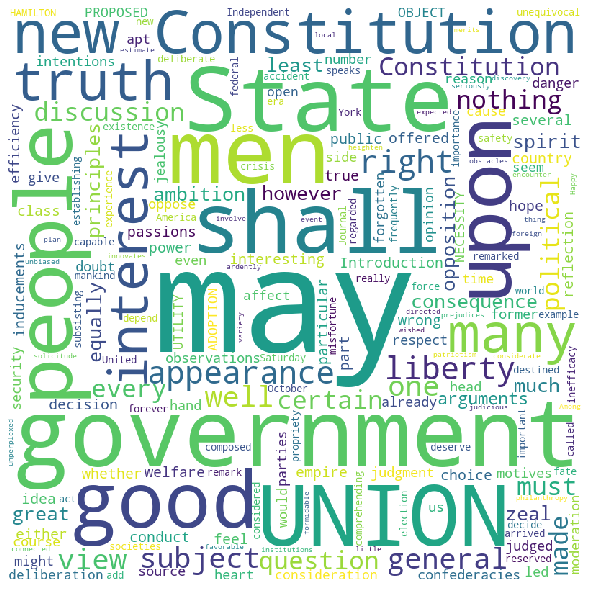

In [127]:
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()